In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data_set.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
def classify(i):
    if i==4:
        return 1
    else:
        return 0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
df['result'] = df['Class'].apply(classify)

In [6]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,result
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0


In [7]:
df.drop('Class', inplace=True,axis=1)

In [8]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,result
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2 )
pca.fit(df[df.columns[1:-1]])

PCA(n_components=2)

In [10]:
x_pca = pca.transform(df[df.columns[1:-1]])

In [11]:
x_pca

array([[-4.48210185,  0.02402335],
       [ 4.81965073, -4.73973426],
       [-4.63295991, -0.609533  ],
       ...,
       [10.26058339,  7.27245094],
       [ 6.40116473,  2.4997811 ],
       [ 7.50116539,  1.2122419 ]])

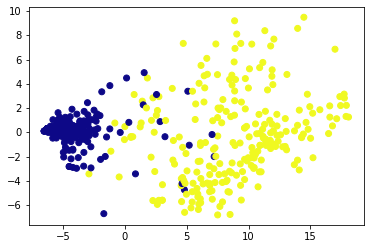

In [12]:
plt.figure()
plt.scatter(x = x_pca[:,0],y = x_pca[:,1], c = df['result'],cmap = 'plasma')

In [13]:
from sklearn.svm import SVC
svc = SVC()
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te  = train_test_split(x_pca , df['result'],test_size=0.3)

In [14]:
svc.fit(X_tr,y_tr)

SVC()

In [15]:
predictions = svc.predict(X_te)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
confusion_matrix(y_te,predictions)

array([[142,   3],
       [  0,  60]], dtype=int64)

In [18]:
print(classification_report(y_te,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       145
           1       0.95      1.00      0.98        60

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.98       205
weighted avg       0.99      0.99      0.99       205



In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid=param_grid,verbose = 3)
grid.fit(X_tr,y_tr)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.938 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.906 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.917 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.979 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.979 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.938 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.948 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.989 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.979 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.969 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ..............C=1000, gamma=0.0001;, score=0.958 total time=   0.0s
[CV 3/5] END ..............C=1000, gamma=0.0001;, score=0.948 total time=   0.0s
[CV 4/5] END ..............C=1000, gamma=0.0001;, score=0.989 total time=   0.0s
[CV 5/5] END ..............C=1000, gamma=0.0001;, score=0.979 total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [31]:
svc1  = SVC(C=100,gamma = 0.01)

In [33]:
svc1.fit(X_tr,y_tr)

SVC(C=100, gamma=0.01)

In [34]:
predictions_n = svc1.predict(X_te)

In [35]:
confusion_matrix(y_te,predictions_n)

array([[142,   3],
       [  0,  60]], dtype=int64)

In [37]:
print(classification_report(y_te,predictions_n))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       145
           1       0.95      1.00      0.98        60

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.98       205
weighted avg       0.99      0.99      0.99       205



<AxesSubplot:xlabel='result', ylabel='count'>

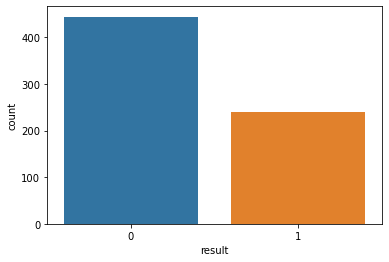

In [38]:
sns.countplot(data = df,x=df['result'])

In [27]:
x_pca

array([[-4.48210185,  0.02402335],
       [ 4.81965073, -4.73973426],
       [-4.63295991, -0.609533  ],
       ...,
       [10.26058339,  7.27245094],
       [ 6.40116473,  2.4997811 ],
       [ 7.50116539,  1.2122419 ]])

In [28]:
pca.components_

array([[ 0.29673577,  0.40397067,  0.39275858,  0.33120214,  0.24973982,
         0.44261347,  0.29207832,  0.35453597,  0.12457633],
       [-0.07350664,  0.22992885,  0.16470098, -0.09819754,  0.20021505,
        -0.78056963,  0.00847974,  0.46919452,  0.18806889]])

In [29]:
df_vis = pd.DataFrame(pca.components_ , columns=df.columns[1:-1])
df_vis.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.296736,0.403971,0.392759,0.331202,0.249740,0.442613,0.292078,0.354536,0.124576
1,-0.073507,0.229929,0.164701,-0.098198,0.200215,-0.780570,0.008480,0.469195,0.188069


<AxesSubplot:>

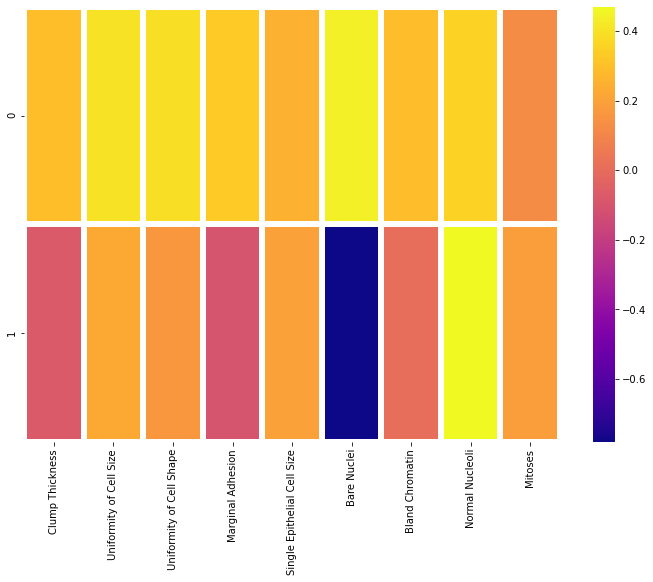

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df_vis , cmap='plasma',linewidths=5)